# **Tarea 1. Extreme Learning Machine**

Implemente los siguientes clasificadores

- un Perceptrón multicapa.
- una Máquina de aprendizaje extremo.
- una Máquina de aprendizaje con pesos binarios ${-1,1}$.

Para clasificar datos que tienen la siguiente representación.
$x_i$ una matriz de $n \times n$ enteros (con $n=12$)
$y_i \in {0,1,2,3,4,5}$

Donde las entradas de la matriz $x$ se pueden interpretar como índices de columnas de una matriz $E = d \times m$ ($d=128$, $m=256$).

Para el caso de las ELM imponga evalúe el efecto de las reguralarizaciiones sobre la capa de salida:

- No regularización.
- Ridge
- lasso
- Elastic-Net

Como referencia, los datos son extraídos mediante una codificación por una VQ-VAE de la BD "Facial Expression Recognition Challenge".

## **Ejercicio 1**

>Se usaron 12 épocas, ya que con esas se notó "buen" desempeño. El perceptrón cuenta con 4 capas ocultas con 640, 1650, 3000 y 500 neuronas respectivamente. Se usó el optimzador de Descenso de Gradiente Estocástico y una tasa de aprendizaje de 1e-3. Se usó la función de activación "relu" en las 4 capas ocultas.

## **1.- Librerías y datos**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad
import matplotlib.pyplot as plt

def plot_metrics(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    # Gráfico de precisión
    ax1.plot(history.history['accuracy'], color='blue', label='Entrenamiento')
    ax1.plot(history.history['val_accuracy'], color='red', label='Validación')
    ax1.set_title('Precisión del modelo')
    ax1.set_ylabel('Precisión')
    ax1.set_xlabel('Época')
    ax1.grid(True)
    ax1.legend()
    # Gráfico de pérdida
    ax2.plot(history.history['loss'], color='blue', label='Entrenamiento')
    ax2.plot(history.history['val_loss'], color='red', label='Validación')
    ax2.set_title('Pérdida del modelo')
    ax2.set_ylabel('Pérdida')
    ax2.set_xlabel('Época')
    ax2.grid(True)
    ax2.legend()
    # Mostrar gráficos
    plt.tight_layout()
    plt.show()

# Cargar los datos
datos = np.load('codemaps.npy') # Vectores de entrada de 12x12 (35000 
etiquetas = np.load('labels.npy')  # Etiquetas de los datos (35000)
# Verificar las dimensiones de los datos
print('Dimensiones de los datos:    ', datos.shape)
print('Dimensiones de las etiquetas:', etiquetas.shape)

Dimensiones de los datos:     (35000, 12, 12)
Dimensiones de las etiquetas: (35000, 7)


## **2.- Preparación de datos**

In [2]:
# Parámetros
n_epochs = 12
batch_size = 500
# División de los datos en entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(datos, etiquetas, test_size=0.2, random_state=42)
# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 12*12))  # Aplanar el input a 1D
X_val = scaler.transform(X_val.reshape(-1, 12*12))          # Aplanar el input a 1D

## **3.- Modelo**

In [3]:
# Construir el modelo
MLP = Sequential([
    Input(shape = (12*12,)),
    Dense(640, activation = 'relu'),
    Dense(1650, activation = 'relu'),
    Dense(3000, activation = 'relu'),
    Dense(500, activation = 'relu'),
    Dense(7, activation = 'softmax')
])
# Compilar el modelo
MLP.compile(optimizer = SGD(learning_rate = 1e-3), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
# Entrenar el modelo
history = MLP.fit(X_train, y_train, epochs = n_epochs,
                  batch_size = batch_size,
                  validation_split = 0.2)

Epoch 1/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.1933 - loss: 1.9353 - val_accuracy: 0.2377 - val_loss: 1.8987
Epoch 2/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.2424 - loss: 1.8883 - val_accuracy: 0.2461 - val_loss: 1.8702
Epoch 3/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.2506 - loss: 1.8628 - val_accuracy: 0.2482 - val_loss: 1.8540
Epoch 4/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.2476 - loss: 1.8514 - val_accuracy: 0.2480 - val_loss: 1.8439
Epoch 5/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.2533 - loss: 1.8395 - val_accuracy: 0.2479 - val_loss: 1.8372
Epoch 6/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.2554 - loss: 1.8290 - val_accuracy: 0.2477 - val_loss: 1.8324
Epoch 7/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.2488 - loss: 1.8300 - val_accuracy: 0.2479 - val_loss: 1.8289
Epoch 8/12
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.2593 - loss: 1.8191 - val_accuracy: 0.

## **4.- Evaluación**

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2488 - loss: 1.8258
Pérdida en el conjunto de prueba:
 1.8217724561691284
Precisión en el conjunto de prueba:
 0.25


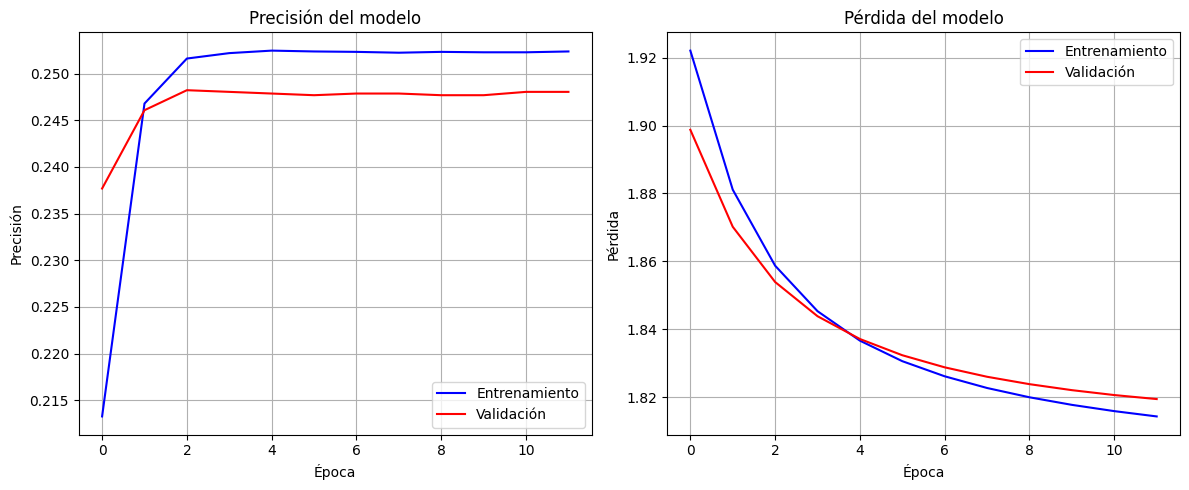

In [4]:
# Evaluar en el conjunto de prueba
test_loss, test_acc = MLP.evaluate(X_val, y_val)
print('Pérdida en el conjunto de prueba:\n', test_loss)
print('Precisión en el conjunto de prueba:\n', test_acc)
plot_metrics(history)

## **Ejercicio 2**

>Se definió sólo un modelo en el que se incluyeron todos los casos con y sin regularizador. El número de capas ocultas fue de 1500 neuronas y se decidieron sus parámetros conforme mejor desempeño tuvieron. En todos los casos se usó la tangente inversa como función de activación.

**Librerías y Preparación de Datos**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# Cargar los datos
datos = np.load('codemaps.npy') # Vectores de entrada de 12x12 (35000 
etiquetas = np.load('labels.npy')  # Etiquetas de los datos (35000)
# División de los datos en entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(datos, etiquetas, test_size=0.2, random_state=42)
# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 12*12))
X_val = scaler.transform(X_val.reshape(-1, 12*12)) 

# Parámetros
n_input = X_train.shape[1] # Número de neuronas en la capa de entrada
hidden_layers = 1500       # Número de neuronas en la capa oculta

## **Modelo**

In [ ]:
class ExtremeLearningMachine:
    def __init__(self, n_input, n_hidden, activation_function='tanh', regularization=None, alpha=1.0, l1_ratio=0.5):
        self.W = np.random.randn(n_hidden, n_input)  # Pesos aleatorios
        self.b = np.random.randn(n_hidden, 1)        # Bias aleatorio
        self.activation_function = activation_function
        self.regularization = regularization  # "ridge", "lasso", "elasticnet" o None
        self.alpha = alpha  # Coeficiente de regularización
        self.l1_ratio = l1_ratio  # Sólo para ElasticNet

    def activation(self, X):
        if self.activation_function == 'sigmoid':
            return 1.0 / (1.0 + np.exp(-X))  # Sigmoide
        elif self.activation_function == 'tanh':
            return np.tanh(X)  # Tangente hiperbólica
        elif self.activation_function == 'relu':
            return np.maximum(0, X)  # ReLU

    def fit(self, X, y):
        # Calcular las activaciones de la capa oculta
        H = self.activation(np.dot(self.W, X.T) + self.b)
        
        # Seleccionar el método de regularización
        if self.regularization == "ridge":
            model = Ridge(alpha=self.alpha, fit_intercept=False)
        elif self.regularization == "lasso":
            model = Lasso(alpha=self.alpha, fit_intercept=False, max_iter=10000)
        elif self.regularization == "elasticnet":
            model = ElasticNet(alpha=self.alpha, l1_ratio=self.l1_ratio, fit_intercept=False, max_iter=10000)
        else:
            # Pseudo-inversa para solución sin regularización
            H_pinv = np.linalg.pinv(H.T)
            self.beta = np.dot(H_pinv, y)
            return
        
        # Ajustar el modelo con regularización
        model.fit(H.T, y)
        self.beta = model.coef_.T if hasattr(model, 'coef_') else model.coef_
    
    def predict(self, X):
        H = self.activation(np.dot(self.W, X.T) + self.b)
        return np.dot(H.T, self.beta)

## **Evaluación**

In [ ]:
# Se cambia "ridge", "lasso", o "elasticnet" según el método de regularización que quieras usar
ELM_sin_regularizacion = ExtremeLearningMachine(n_input=n_input, n_hidden=hidden_layers)
ELM_ridge = ExtremeLearningMachine(n_input=n_input, n_hidden=hidden_layers, regularization="ridge", alpha=0.01)
ELM_lasso = ExtremeLearningMachine(n_input=n_input, n_hidden=hidden_layers, regularization="lasso", alpha=0.01)
ELM_elasticnet = ExtremeLearningMachine(n_input=n_input, n_hidden=hidden_layers, regularization="elasticnet", alpha=0.1, l1_ratio=0.5)

# Entrenar los modelos
ELM_sin_regularizacion.fit(X_train, y_train)
ELM_ridge.fit(X_train, y_train)
ELM_lasso.fit(X_train, y_train)
ELM_elasticnet.fit(X_train, y_train)

# Realizar predicciones
y_pred_sin_regularizacion = ELM_sin_regularizacion.predict(X_val) # Predicción sin regularización
y_pred_ridge = ELM_ridge.predict(X_val) # Predicción con Ridge
y_pred_lasso = ELM_lasso.predict(X_val) # Predicción con Lasso
y_pred_elasticnet = ELM_elasticnet.predict(X_val) # Predicción con ElasticNet

# Calcular la precisión
accuracy_sin_regularizacion = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred_sin_regularizacion, axis=1))
accuracy_ridge = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred_ridge, axis=1))
accuracy_lasso = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred_lasso, axis=1))
accuracy_elasticnet = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred_elasticnet, axis=1))

print("Accuracy sin regularización:", accuracy_sin_regularizacion)
print("Accuracy con Ridge:         ", accuracy_ridge)
print("Accuracy con Lasso:         ", accuracy_lasso)
print("Accuracy con ElasticNet:    ", accuracy_elasticnet)

Accuracy sin regularización: 0.218
Accuracy con Ridge:          0.22328571428571428
Accuracy con Lasso:          0.2372857142857143
Accuracy con ElasticNet:     0.21885714285714286


## **Ejercicio 3**

>Se definió sólo un modelo en el que se incluyeron todos los casos con y sin regularizador. El número de capas ocultas fue de 2000 neuronas y se decidieron sus parámetros conforme mejor desempeño tuvieron. En todos los casos se usó la tangente inversa como función de activación.

**Librerías y Preparación de Datos**

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Cargar los datos
datos = np.load('codemaps.npy')  # Vectores de entrada de 12x12
etiquetas = np.load('labels.npy')  # Etiquetas de los datos
# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(datos, etiquetas, test_size=0.2, random_state=42)
# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 12*12))
X_val = scaler.transform(X_val.reshape(-1, 12*12))

# Parámetros del modelo
n_input = X_train.shape[1] # Número de neuronas en la capa de entrada
n_hidden = 2000            # Número de neuronas en la capa oculta

## **Modelo**

In [ ]:
class ELM_BinaryW:
    def __init__(self, n_input, n_hidden, activation_function = 'tanh', regularization = None, alpha = 1.0, l1_ratio = 0.5):
        # Inicializamos los pesos de la capa oculta como {-1, 1}
        self.W = np.random.choice([-1, 1], size=(n_hidden, n_input)) # Pesos binarios {-1, 1}
        self.b = np.random.choice([-1, 1], size=(n_hidden, 1))       # Bias binarios {-1, 1}
        self.activation_function = activation_function
        self.regularization = regularization # "ridge", "lasso", "elasticnet" o None
        self.alpha = alpha # Coeficiente de regularización
        self.l1_ratio = l1_ratio # Sólo para ElasticNet

    def activation(self, X):
        if self.activation_function == 'sigmoid':
            return 1.0 / (1.0 + np.exp(-X))  # Sigmoide
        elif self.activation_function == 'tanh':
            return np.tanh(X)  # Tangente hiperbólica
        elif self.activation_function == 'relu':
            return np.maximum(0, X)  # ReLU

    def fit(self, X, y):
        # Calcular las activaciones de la capa oculta
        H = self.activation(np.dot(self.W, X.T) + self.b)
        
        # Seleccionar el método de regularización
        if self.regularization == "ridge":
            model = Ridge(alpha = self.alpha, fit_intercept = False)
        elif self.regularization == "lasso":
            model = Lasso(alpha = self.alpha, fit_intercept = False, max_iter = 10000)
        elif self.regularization == "elasticnet":
            model = ElasticNet(alpha = self.alpha, l1_ratio = self.l1_ratio, fit_intercept = False, max_iter = 10000)
        else:
            # Pseudo-inversa para solución sin regularización
            H_pinv = np.linalg.pinv(H.T)
            self.beta = np.dot(H_pinv, y)
            return
        
        # Ajustar el modelo con regularización
        model.fit(H.T, y)
        self.beta = model.coef_.T if hasattr(model, 'coef_') else model.coef_
    
    def predict(self, X):
        H = self.activation(np.dot(self.W, X.T) + self.b)
        return np.dot(H.T, self.beta)

## **Evaluación**

In [ ]:
# Se cambia "ridge", "lasso", o "elasticnet" según el método de regularización a utilizar.
ELM_sin_regularizacion_bin = ELM_BinaryW(n_input=n_input, n_hidden=n_hidden)
ELM_ridge_bin = ELM_BinaryW(n_input=n_input, n_hidden=n_hidden, regularization = "ridge", alpha = 0.01)
ELM_lasso_bin = ELM_BinaryW(n_input=n_input, n_hidden=n_hidden, regularization = "lasso", alpha = 0.01)
ELM_elasticnet_bin = ELM_BinaryW(n_input=n_input, n_hidden=n_hidden, regularization = "elasticnet", alpha = 0.1, l1_ratio = 0.5)

# Entrenar los modelos con pesos binarios
ELM_sin_regularizacion_bin.fit(X_train, y_train)
ELM_ridge_bin.fit(X_train, y_train)
ELM_lasso_bin.fit(X_train, y_train)
ELM_elasticnet_bin.fit(X_train, y_train)

# Realizar predicciones
y_pred_sin_regularizacion_bin = ELM_sin_regularizacion_bin.predict(X_val) # Predicción sin regularización
y_pred_ridge_bin = ELM_ridge_bin.predict(X_val) # Predicción con Ridge
y_pred_lasso_bin = ELM_lasso_bin.predict(X_val) # Predicción con Lasso
y_pred_elasticnet_bin = ELM_elasticnet_bin.predict(X_val) # Predicción con ElasticNet

# Calcular la precisión de los modelos
accuracy_sin_regularizacion_bin = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred_sin_regularizacion_bin, axis=1))
accuracy_ridge_bin = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred_ridge_bin, axis=1))
accuracy_lasso_bin = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred_lasso_bin, axis=1))
accuracy_elasticnet_bin = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred_elasticnet_bin, axis=1))

print("Accuracy sin regularización (Pesos Binarios):", accuracy_sin_regularizacion_bin)
print("Accuracy con Ridge (Pesos Binarios):         ", accuracy_ridge_bin)
print("Accuracy con Lasso (Pesos Binarios):         ", accuracy_lasso_bin)
print("Accuracy con ElasticNet (Pesos Binarios):    ", accuracy_elasticnet_bin)

Accuracy sin regularización (Pesos Binarios): 0.20985714285714285
Accuracy con Ridge (Pesos Binarios):          0.21928571428571428
Accuracy con Lasso (Pesos Binarios):          0.24657142857142858
Accuracy con ElasticNet (Pesos Binarios):     0.1362857142857143
